In [1]:
!pip install praw

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 189.3/189.3 kB 3.4 MB/s eta 0:00:00


In [2]:
import os, time, csv, sys
from datetime import datetime
import pandas as pd
import praw

In [3]:
# Directly assign your Reddit API credentials
REDDIT_CLIENT_ID     = "RTnd_tsgBnT5bA7nNuZQzQ"
REDDIT_CLIENT_SECRET = "iO0F4DMa68aue1dYMCW1W9lWqLtHXQ"
REDDIT_USERNAME      = "Adorable_Feature8671"   # your Reddit username
REDDIT_PASSWORD      = ""                       # optional: only if needed for private access
REDDIT_USER_AGENT    = "MentalHealthHousingResearch by /u/Adorable_Feature8671"


In [4]:
POSTS_PER_SUB = 200       # try 200 first to test; later you can increase to 1000
LISTING = "top"
TIME_FILTER = "year"


In [5]:
CSV_OUT     = "reddit_posts_labeled.csv"
PARQUET_OUT = "reddit_posts_labeled.parquet"

In [6]:
# Subreddit → Class mapping
subreddit_to_label = {
    # ----- Financial -----
    "personalfinance":      "financial",
    "povertyfinance":       "financial",
    "financialstress":      "financial",
    "workreform":           "financial",

    # ----- Housing -----
    "aushousing":           "housing",
    "realestate":           "housing",
    "housing":              "housing",
    "tenants":              "housing",

    # ----- Social / Emotional -----
    "depression":           "depression",
    "anxiety":              "anxiety",
    "socialanxiety":        "social",
    "offmychest":           "social",
    "relationship_advice":  "social",
    "lonely":               "social",

    # ----- Stress / General -----
    "stress":               "stress",
    "burnout":              "stress",
    "work":                 "stress",
    "mentalhealth":         "stress",

    # ----- Other / Mixed -----
    "confession":           "other",
    "casualconversation":   "other",
    "randomthoughts":       "other",
}

SLEEP_BETWEEN_POSTS = 0.08
SLEEP_BETWEEN_SUBS  = 1.5

In [7]:
def get_reddit():
    """Authenticate and return a Reddit instance."""
    return praw.Reddit(
        client_id=REDDIT_CLIENT_ID,
        client_secret=REDDIT_CLIENT_SECRET,
        username=REDDIT_USERNAME,
        password=REDDIT_PASSWORD,
        user_agent=REDDIT_USER_AGENT,
        ratelimit_seconds=5,
    )

In [8]:
def fetch_from_subreddit(r, sub, limit, listing="top", time_filter="year"):
    s = r.subreddit(sub)
    if listing == "top":
        generator = s.top(time_filter=time_filter, limit=limit)
    elif listing == "hot":
        generator = s.hot(limit=limit)
    else:
        generator = s.new(limit=limit)

    for post in generator:
        if getattr(post, "removed_by_category", None) is not None:
            continue
        title = post.title or ""
        body  = post.selftext or ""
        if not title and not body:
            continue
        yield {
            "id": post.id,
            "subreddit": str(post.subreddit).lower(),
            "title": title.replace("\r", " ").replace("\n", " ").strip(),
            "text": body.replace("\r", " ").strip(),
            "created_utc": float(post.created_utc),
            "created_iso": datetime.utcfromtimestamp(post.created_utc).isoformat(),
            "score": int(post.score),
            "num_comments": int(post.num_comments),
            "permalink": f"https://www.reddit.com{post.permalink}",
        }



It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



✅ Authenticated as: u/None

[1/21] Collecting from r/personalfinance → label='financial' (limit=200)


/tmp/ipython-input-3876219399.py:23: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  "created_iso": datetime.utcfromtimestamp(post.created_utc).isoformat(),
It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



   … collected 200 posts


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.




[2/21] Collecting from r/povertyfinance → label='financial' (limit=200)


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



   … collected 200 posts


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.




[3/21] Collecting from r/financialstress → label='financial' (limit=200)
⚠️ Skipping r/financialstress due to error: received 404 HTTP response
   … collected 0 posts


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.




[4/21] Collecting from r/workreform → label='financial' (limit=200)


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



   … collected 200 posts


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.




[5/21] Collecting from r/aushousing → label='housing' (limit=200)
⚠️ Skipping r/aushousing due to error: received 404 HTTP response
   … collected 0 posts


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.




[6/21] Collecting from r/realestate → label='housing' (limit=200)


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



   … collected 200 posts


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.




[7/21] Collecting from r/housing → label='housing' (limit=200)
   … collected 0 posts


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.




[8/21] Collecting from r/tenants → label='housing' (limit=200)
   … collected 0 posts


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.




[9/21] Collecting from r/depression → label='depression' (limit=200)


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



   … collected 200 posts


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.




[10/21] Collecting from r/anxiety → label='anxiety' (limit=200)


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



   … collected 200 posts


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.




[11/21] Collecting from r/socialanxiety → label='social' (limit=200)


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



   … collected 200 posts


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.




[12/21] Collecting from r/offmychest → label='social' (limit=200)


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



   … collected 200 posts


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.




[13/21] Collecting from r/relationship_advice → label='social' (limit=200)


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



   … collected 200 posts


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.




[14/21] Collecting from r/lonely → label='social' (limit=200)


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



   … collected 200 posts


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.




[15/21] Collecting from r/stress → label='stress' (limit=200)


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



   … collected 200 posts


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.




[16/21] Collecting from r/burnout → label='stress' (limit=200)


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



   … collected 200 posts


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.




[17/21] Collecting from r/work → label='stress' (limit=200)


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



   … collected 200 posts


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.




[18/21] Collecting from r/mentalhealth → label='stress' (limit=200)


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



   … collected 200 posts


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.




[19/21] Collecting from r/confession → label='other' (limit=200)


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



   … collected 200 posts


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.




[20/21] Collecting from r/casualconversation → label='other' (limit=200)


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



   … collected 200 posts


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.




[21/21] Collecting from r/randomthoughts → label='other' (limit=200)


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



   … collected 200 posts

💾 Saved CSV: reddit_posts_labeled.csv  (3400 posts)

📊 Class counts:
label
social        800
stress        800
financial     600
other         600
housing       200
depression    200
anxiety       200
Name: count, dtype: int64

✅ Done collecting!


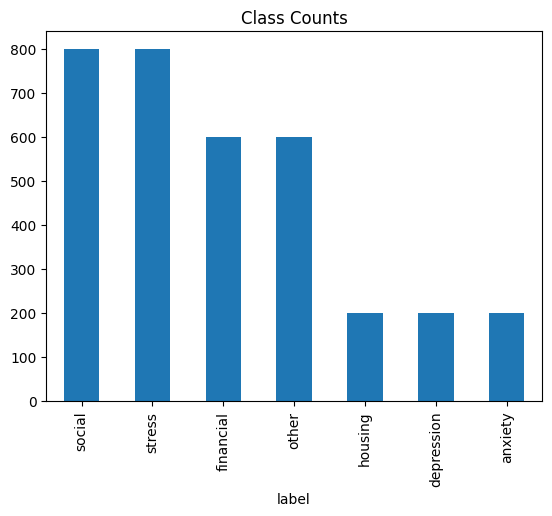

In [9]:
def main():
    reddit = get_reddit()
    print(f"✅ Authenticated as: u/{reddit.user.me()}")

    rows = []
    for i, (sub, label) in enumerate(subreddit_to_label.items(), start=1):
        print(f"\n[{i}/{len(subreddit_to_label)}] Collecting from r/{sub} → label='{label}' (limit={POSTS_PER_SUB})")
        count = 0
        try:
            for post in fetch_from_subreddit(reddit, sub, POSTS_PER_SUB, listing=LISTING, time_filter=TIME_FILTER):
                post["label"] = label
                rows.append(post)
                count += 1
                time.sleep(SLEEP_BETWEEN_POSTS)
        except Exception as e:
            print(f"⚠️ Skipping r/{sub} due to error: {e}")
        print(f"   … collected {count} posts")
        time.sleep(SLEEP_BETWEEN_SUBS)

    if not rows:
        print("❌ No posts collected.")
        return

    df = pd.DataFrame(rows)
    before = len(df)
    df.drop_duplicates(subset=["id"], inplace=True)
    after = len(df)
    df.to_csv(CSV_OUT, index=False, encoding="utf-8")
    print(f"\n💾 Saved CSV: {CSV_OUT}  ({after} posts)")

    # Show class distribution
    df["label"].value_counts().plot(kind="bar", title="Class Counts")
    print("\n📊 Class counts:")
    print(df["label"].value_counts())

    print("\n✅ Done collecting!")


main()

🔹 dataset shape: (3400, 10)
🔹 columns: ['id', 'subreddit', 'title', 'text', 'created_utc', 'created_iso', 'score', 'num_comments', 'permalink', 'label']

        id        subreddit  \
0  1jrpde7  personalfinance   
1  1n96stx  personalfinance   
2  1kn4xsn  personalfinance   

                                               title  \
0  Wife and I got married in 2022. Our wedding ve...   
1        $20k raise, but only $100 more per paycheck   
2  Chase only applied $23 of my $23,000 credit ca...   

                                                text   created_utc  \
0  As stated in the title we got a call from our ...  1.743808e+09   
1  This is more of a warning than anything else. ...  1.757083e+09   
2  Hi everyone, I really need some advice or insi...  1.747305e+09   

           created_iso  score  num_comments  \
0  2025-04-04T23:06:13  10989           492   
1  2025-09-05T14:29:00   8756           611   
2  2025-05-15T10:34:19   7395           681   

                          

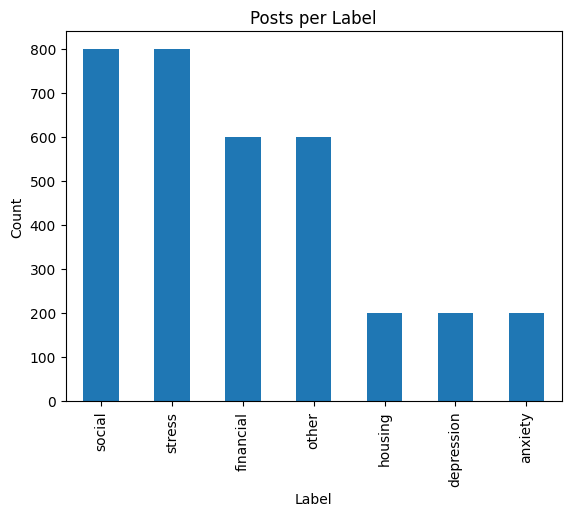

In [10]:
import pandas as pd

# load your dataset
df = pd.read_csv("reddit_posts_labeled.csv")

# quick peek
print("🔹 dataset shape:", df.shape)
print("🔹 columns:", df.columns.tolist())
print()
print(df.head(3))  # show first few rows

# count posts per label
print("\n📊 posts per label:")
print(df["label"].value_counts())

# optional: visualize it
import matplotlib.pyplot as plt
df["label"].value_counts().plot(kind="bar", title="Posts per Label", ylabel="Count", xlabel="Label")
plt.show()


Before balancing:
label
social        800
stress        800
financial     600
other         600
housing       200
depression    200
anxiety       200
Name: count, dtype: int64

After balancing:
label
housing       200
anxiety       200
financial     200
depression    200
other         200
social        200
stress        200
Name: count, dtype: int64

✅ Balanced dataset saved as reddit_balanced.csv


/tmp/ipython-input-3668052189.py:14: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_balanced = df.groupby("label", group_keys=False).apply(lambda x: x.sample(min_count, random_state=42))


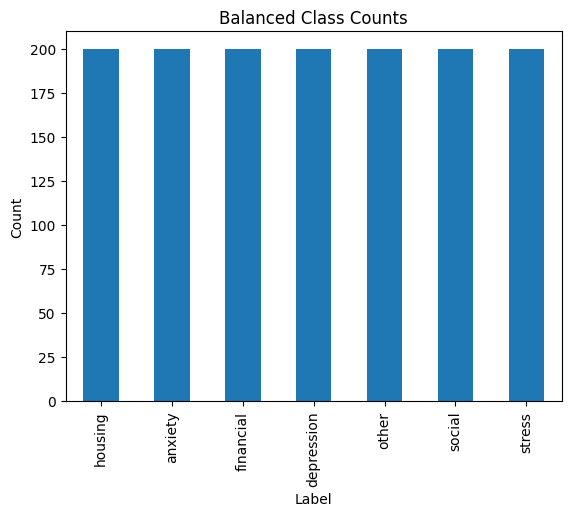

In [11]:
import pandas as pd

# Load your dataset
df = pd.read_csv("reddit_posts_labeled.csv")

# Check current class counts
print("Before balancing:")
print(df["label"].value_counts())

# Find the smallest class size
min_count = df["label"].value_counts().min()

# Randomly sample each class to that size
df_balanced = df.groupby("label", group_keys=False).apply(lambda x: x.sample(min_count, random_state=42))

# Shuffle the dataset (so classes mix)
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

# Check new balanced counts
print("\nAfter balancing:")
print(df_balanced["label"].value_counts())

# Save to new CSV
df_balanced.to_csv("reddit_balanced.csv", index=False, encoding="utf-8")

print("\n✅ Balanced dataset saved as reddit_balanced.csv")

# Optional: plot to confirm
import matplotlib.pyplot as plt
df_balanced["label"].value_counts().plot(kind="bar", title="Balanced Class Counts", ylabel="Count", xlabel="Label")
plt.show()


Explolatory Data Analysis

In [12]:
import pandas as pd

df = pd.read_csv("reddit_balanced.csv")
print("Shape:", df.shape)
df.head(3)


Shape: (1400, 10)


,id,subreddit,title,text,created_utc,created_iso,score,num_comments,permalink,label
0,1nsfwmi,realestate,Listing Agent Says Offer is Insulting?,UPDATE: Our realtor stopped answering any of t...,1.759036e+09,2025-09-28T05:07:56,659,625,https://www.reddit.com/r/RealEstate/comments/1...,housing
1,1mnx8oq,realestate,Am I the only one who is completely turned off...,NaN,1.754967e+09,2025-08-12T02:51:35,1075,300,https://www.reddit.com/r/RealEstate/comments/1...,housing
2,1hart2u,anxiety,"People with chronic anxiety, what do you do fo...",I am just a cook at a fast food restaurant. I ...,1.733799e+09,2024-12-10T02:50:57,309,679,https://www.reddit.com/r/Anxiety/comments/1har...,anxiety


Check for null or missing data

In [13]:
df.isnull().sum()


,0
id,0
subreddit,0
title,0
text,149
created_utc,0
created_iso,0
score,0
num_comments,0
permalink,0
label,0


Summary of class distribution

In [14]:
print(df["label"].value_counts())


label
housing       200
anxiety       200
financial     200
depression    200
other         200
social        200
stress        200
Name: count, dtype: int64


Post length analysis (title + text)

In [15]:
df["post_length"] = df["title"].fillna("") + " " + df["text"].fillna("")
df["word_count"] = df["post_length"].apply(lambda x: len(str(x).split()))

df["word_count"].describe()


,word_count
count,1400.000000
mean,181.357143
std,180.606174
min,1.000000
25%,63.000000
50%,131.000000
75%,240.000000
max,1351.000000


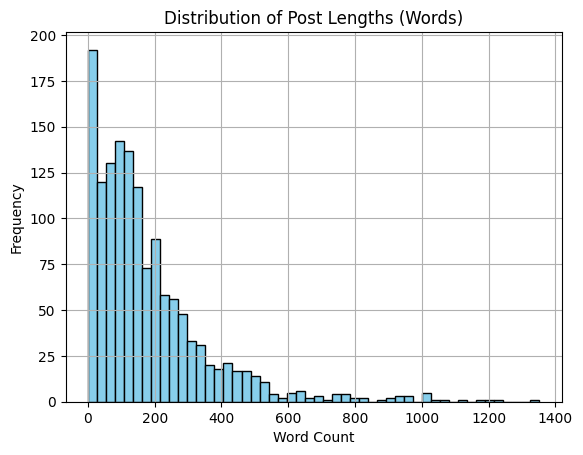

In [16]:
import matplotlib.pyplot as plt

df["word_count"].hist(bins=50, color='skyblue', edgecolor='black')
plt.title("Distribution of Post Lengths (Words)")
plt.xlabel("Word Count")
plt.ylabel("Frequency")
plt.show()


/tmp/ipython-input-3638255659.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="label", y="word_count", data=df, estimator="mean", ci=None)


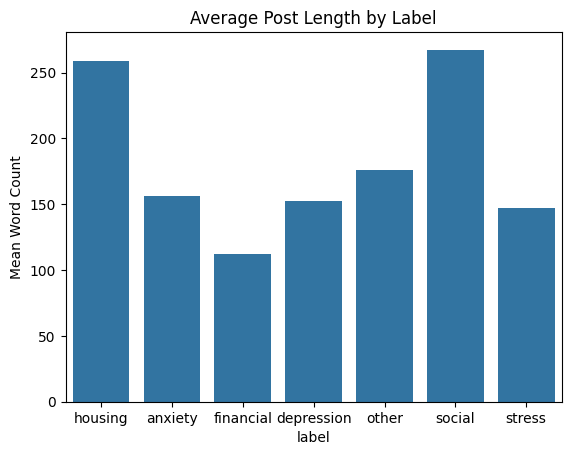

In [17]:
import seaborn as sns

sns.barplot(x="label", y="word_count", data=df, estimator="mean", ci=None)
plt.title("Average Post Length by Label")
plt.ylabel("Mean Word Count")
plt.show()


In [18]:
dup_count = df.duplicated(subset=["title", "text"]).sum()
print(f"Duplicate posts: {dup_count}")


Duplicate posts: 1


In [19]:
from collections import Counter
import re

def top_words(text_series, n=20):
    all_words = " ".join(text_series.dropna().astype(str)).lower()
    words = re.findall(r'\b[a-z]{3,}\b', all_words)
    return Counter(words).most_common(n)

print("Most common words overall:")
print(top_words(df["text"]))


Most common words overall:
[('the', 7660), ('and', 7094), ('that', 2967), ('for', 2477), ('was', 2266), ('this', 1969), ('but', 1960), ('you', 1778), ('have', 1732), ('with', 1675), ('just', 1611), ('they', 1414), ('not', 1380), ('like', 1279), ('she', 1267), ('out', 1051), ('her', 1001), ('all', 948), ('can', 943), ('had', 916)]


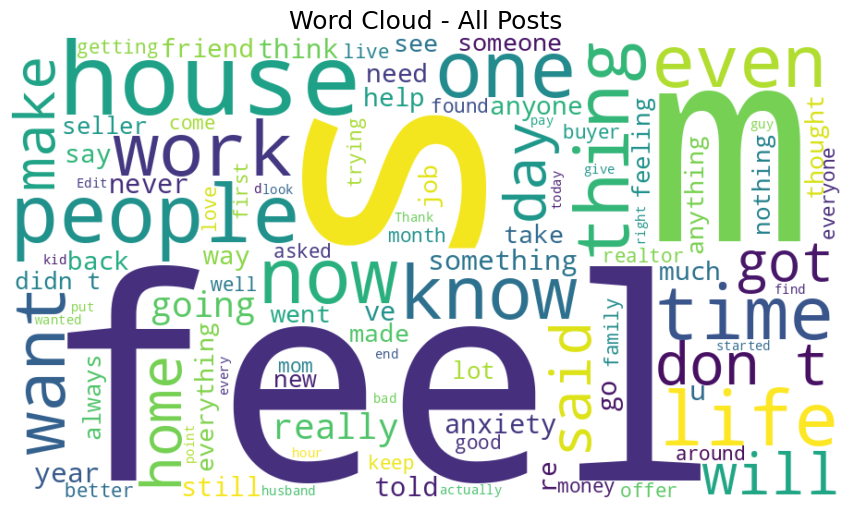

In [20]:
!pip install wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv("reddit_balanced.csv")

# Combine title + text
df["text_combined"] = df["title"].fillna("") + " " + df["text"].fillna("")

# Create one big string of all posts
text_all = " ".join(df["text_combined"].astype(str))

# Generate and plot the word cloud
wc = WordCloud(width=900, height=500, background_color="white", max_words=100).generate(text_all)

plt.figure(figsize=(12,6))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud - All Posts", fontsize=18)
plt.show()


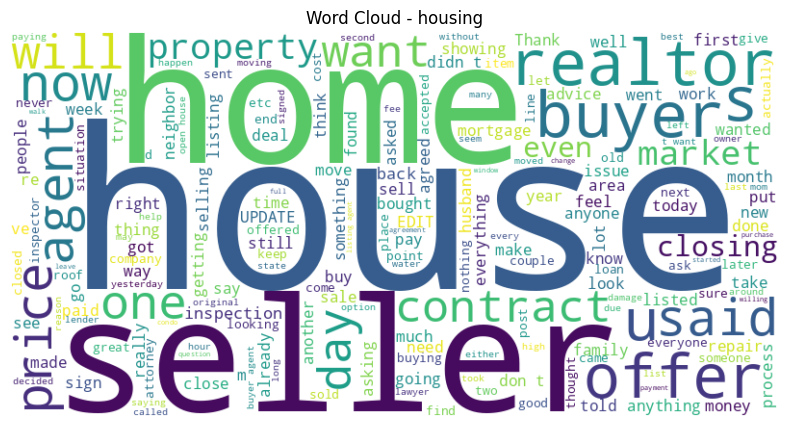

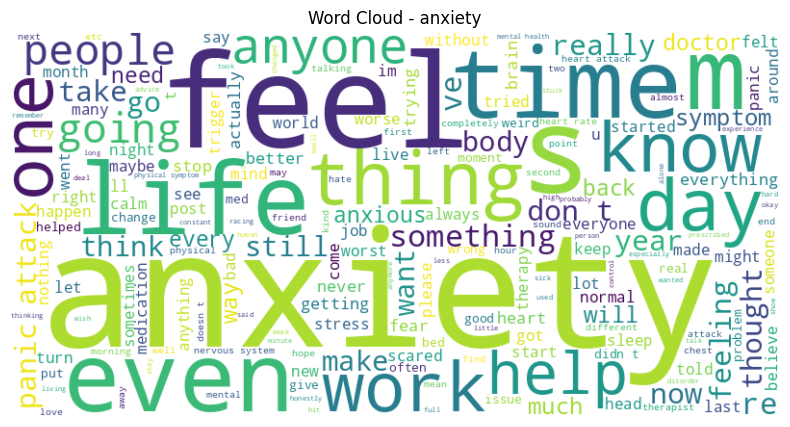

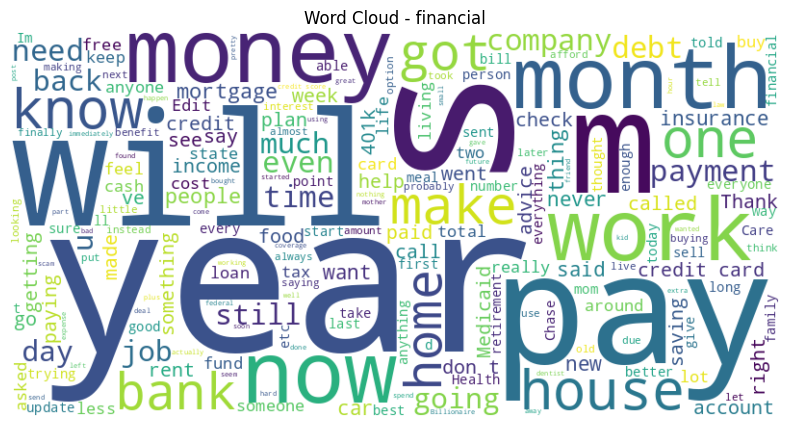

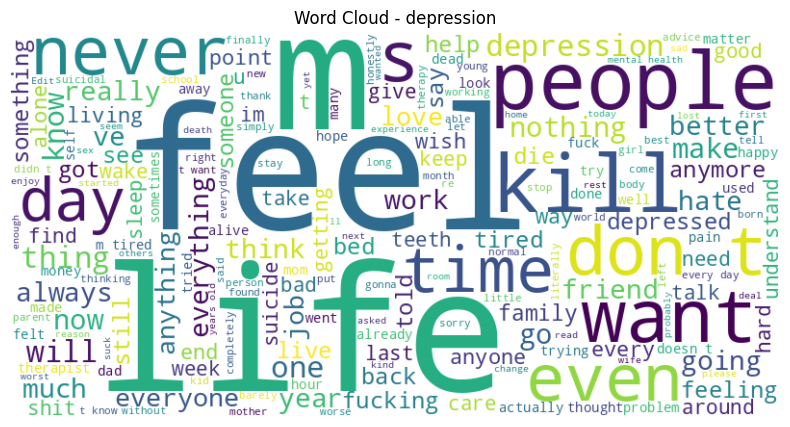

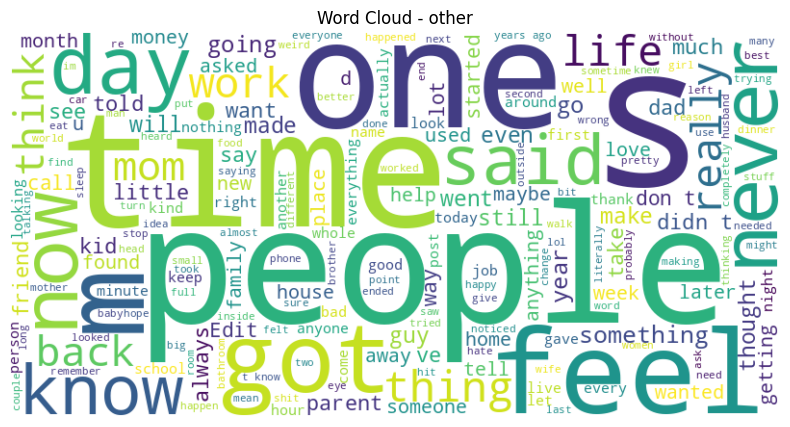

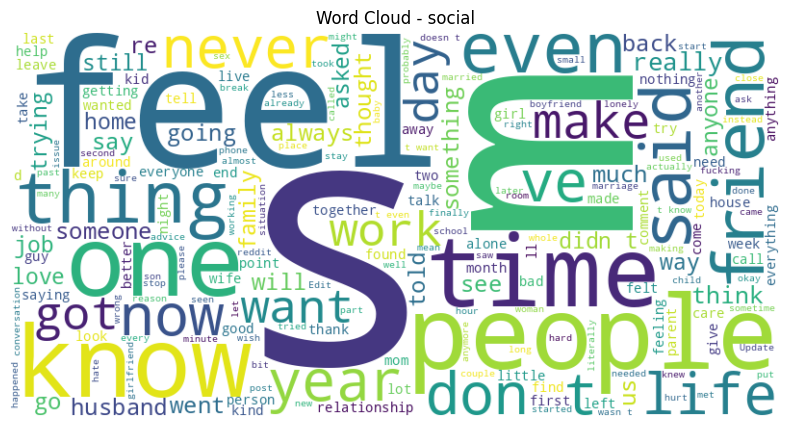

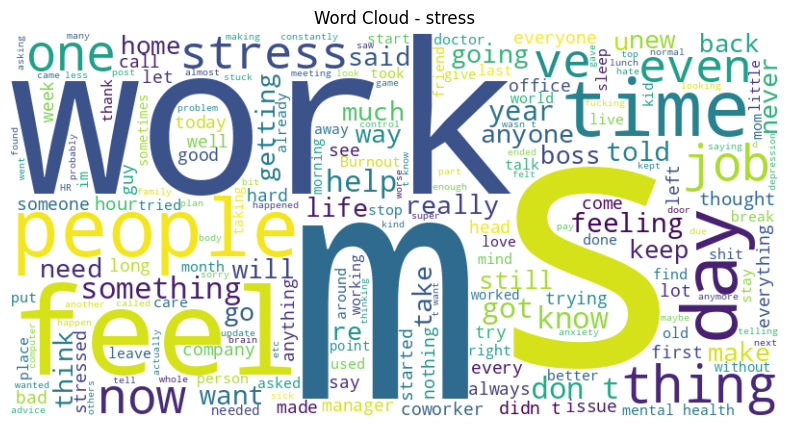

In [21]:
labels = df["label"].unique()
for label in labels:
    subset = df[df["label"] == label]
    text = " ".join(subset["text_combined"].astype(str))
    wc = WordCloud(width=800, height=400, background_color="white").generate(text)
    plt.figure(figsize=(10,5))
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"Word Cloud - {label}")
    plt.show()


In [ ]:
# 1️⃣ Install dependencies
!pip install nltk praw pandas matplotlib seaborn wordcloud

In [ ]:
import pandas as pd
import re, nltk
from nltk.sentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import seaborn as sns

# Download required NLTK resources (only first run)
nltk.download('vader_lexicon')

# 2️⃣ Load your dataset (use the balanced one)
df = pd.read_csv("reddit_balanced.csv")
print("Loaded:", df.shape)
df.head(3)

In [ ]:
# 3️⃣ --- Cleaning function ---
def clean_text(t: str) -> str:
    if not isinstance(t, str):
        return ""
    t = t.replace("\r", " ").replace("\n", " ")
    t = re.sub(r"http\S+|www\.\S+", " ", t)          # remove URLs
    t = re.sub(r"\[(.*?)\]\((.*?)\)", r"\1", t)      # markdown links
    t = re.sub(r"&amp;|&lt;|&gt;", " ", t)
    t = re.sub(r"[“”]", '"', t).replace("’", "'")
    t = re.sub(r"[^\x00-\x7F]+", " ", t)             # remove emojis/non-ascii
    t = re.sub(r"[^a-zA-Z\s]", " ", t)               # remove numbers/punctuation
    t = re.sub(r"\s+", " ", t)
    return t.lower().strip()

# Merge title + text → clean
df["title"] = df["title"].fillna("")
df["text"]  = df["text"].fillna("")
df["content"] = (df["title"].astype(str) + " " + df["text"].astype(str)).str.strip()
df["clean_text"] = df["content"].apply(clean_text)

# Remove empties or very short posts
df["n_words"] = df["clean_text"].str.split().apply(len)
df = df[df["n_words"] >= 6].copy()

print("After cleaning:", df.shape)

In [25]:
# 4️⃣ --- Sentiment / Severity analysis ---
sia = SentimentIntensityAnalyzer()
df["compound"] = df["clean_text"].apply(lambda x: sia.polarity_scores(x)["compound"])

# Classify severity level based on compound score
def classify_severity(score):
    if score <= -0.5:
        return "Severe"
    elif score <= 0:
        return "Moderate"
    else:
        return "Mild"

df["severity_level"] = df["compound"].apply(classify_severity)

In [ ]:
# 5️⃣ --- Quick sanity checks ---
print("\n📊 Severity distribution:")
print(df["severity_level"].value_counts())

# Visualize severity counts
sns.countplot(x="severity_level", data=df, order=["Mild","Moderate","Severe"], palette="coolwarm")
plt.title("Overall Severity Levels in Posts")
plt.show()

# Average severity per label
avg_severity = df.groupby("label")["compound"].mean().sort_values()
plt.figure(figsize=(8,4))
avg_severity.plot(kind="barh", title="Average Severity Score by Label")
plt.xlabel("Average Sentiment (compound score)")
plt.show()

In [ ]:
# 6️⃣ Save cleaned + severity dataset
df.to_csv("reddit_clean_with_severity.csv", index=False, encoding="utf-8")
print("✅ Saved: reddit_clean_with_severity.csv")
df.head(3)

In [ ]:
import re, pandas as pd
import matplotlib.pyplot as plt

# 1) Load cleaned data with severity (from previous step)
df = pd.read_csv("reddit_clean_with_severity.csv")
text_col = "clean_text" if "clean_text" in df.columns else "content"

# 2) Symptom lexicon (editable)
SYMPTOM_LEXICON = {
    "insomnia_sleep": [
        r"\b(can'?t|cannot)\s+sleep\b", r"\bno\s+sleep\b", r"\binsomnia\b",
        r"\bwake up\b", r"\bnightmares?\b", r"\bpoor sleep\b", r"\btrouble sleeping\b"
    ],
    "fatigue_energy": [
        r"\bexhaust(ed|ion)\b", r"\bfatig(ue|ued)\b", r"\blow energy\b", r"\bno energy\b",
        r"\btired all (the )?time\b", r"\bdrained\b", r"\bburnout\b"
    ],
    "concentration": [
        r"\b(can'?t|cannot)\s+(focus|concentrate)\b", r"\bbrain fog\b",
        r"\b(inattentive|distract(ed|ion))\b"
    ],
    "anhedonia_interest": [
        r"\bno (interest|enjoyment)\b", r"\blost interest\b", r"\bdon'?t enjoy\b",
        r"\bnothing feels good\b"
    ],
    "anxiety_panic": [
        r"\bpanic attacks?\b", r"\bheart racing\b", r"\bshort(ness)? of breath\b",
        r"\bshaking\b", r"\bsweat(ing)?\b", r"\bfear\b", r"\banxiety\b", r"\banxious\b",
        r"\bworried?\b"
    ],
    "low_mood_hopeless": [
        r"\bhopeless(ness)?\b", r"\bworthless(ness)?\b", r"\bhelpless(ness)?\b",
        r"\bcry(ing)?\b", r"\bsad(ness)?\b", r"\bdown\b", r"\bempty\b"
    ],
    "irritability": [
        r"\birritable?\b", r"\bangry\b", r"\bfrustrat(ed|ion)\b", r"\bsnappy\b"
    ],
    "appetite_weight": [
        r"\bloss? of appetite\b", r"\bno appetite\b", r"\bover(eat|eating)\b",
        r"\bweight (loss|gain)\b", r"\blost weight\b", r"\bgained weight\b"
    ],
    "somatic_pain": [
        r"\bheadaches?\b", r"\bstomach(ache)?\b", r"\bchest pain\b", r"\bnausea\b",
        r"\bmuscle (ache|pain)s?\b"
    ],
    "work_school_stress": [
        r"\bdeadlines?\b", r"\bassignments?\b", r"\bexams?\b", r"\bworkload\b",
        r"\bovertime\b", r"\bperformance\b", r"\bburn(ed )?out\b"
    ],
    # safety: detect self-harm terms to allow analysis/flagging (do not act on them here)
    "self_harm_ideation": [
        r"\bsuicid(al|e)\b", r"\bkill myself\b", r"\bend it all\b", r"\bself[- ]harm\b",
        r"\bcut(ting)?\b", r"\bno reason to live\b"
    ],
}

# 3) Compile regex patterns once
PATTERNS = {k: [re.compile(p, flags=re.IGNORECASE) for p in v] for k, v in SYMPTOM_LEXICON.items()}

def detect_symptoms(text: str):
    text = text or ""
    hits = {}
    for sym, regs in PATTERNS.items():
        hits[sym] = int(any(r.search(text) for r in regs))
    hits["symptom_count"] = sum(hits.values())
    return hits

sym_df = df[text_col].apply(detect_symptoms).apply(pd.Series)
df_sym = pd.concat([df, sym_df], axis=1)

print("Preview of symptom flags:")
display(df_sym[[text_col, "label", "severity_level"] + list(SYMPTOM_LEXICON.keys())].head(3))

# 4) Summaries
by_label = df_sym.groupby("label")[list(SYMPTOM_LEXICON.keys())].mean().sort_index() * 100
by_severity = df_sym.groupby("severity_level")[list(SYMPTOM_LEXICON.keys())].mean().loc[["Mild","Moderate","Severe"]] * 100

print("\n% of posts with each symptom (by label):")
display(by_label.round(1))

print("\n% of posts with each symptom (by severity):")
display(by_severity.round(1))

# 5) Plots (optional)
ax = by_label.T.plot(kind="bar", figsize=(12,6))
ax.set_ylabel("% of posts (contains symptom keyword)")
ax.set_title("Symptom prevalence by label")
plt.tight_layout(); plt.show()

ax = by_severity.T.plot(kind="bar", figsize=(12,6))
ax.set_ylabel("% of posts (contains symptom keyword)")
ax.set_title("Symptom prevalence by severity")
plt.tight_layout(); plt.show()

# 6) Save outputs
df_sym.to_csv("reddit_clean_with_symptoms.csv", index=False)
by_label.to_csv("symptom_summary_by_label.csv")
by_severity.to_csv("symptom_summary_by_severity.csv")
print("✅ Saved: reddit_clean_with_symptoms.csv, symptom_summary_by_label.csv, symptom_summary_by_severity.csv")


Loaded: reddit_clean_with_severity.csv, shape=(1367, 15)
Text column: clean_text
Extra numeric features: ['compound']
Sizes: 1093 137 137

=== Validation ===
Accuracy: 0.5912408759124088
Macro F1: 0.585291659713996
              precision    recall  f1-score   support

     anxiety      0.833     0.750     0.789        20
  depression      0.500     0.750     0.600        20
   financial      0.611     0.611     0.611        18
     housing      0.850     0.850     0.850        20
       other      0.471     0.400     0.432        20
      social      0.429     0.450     0.439        20
      stress      0.462     0.316     0.375        19

    accuracy                          0.591       137
   macro avg      0.594     0.590     0.585       137
weighted avg      0.594     0.591     0.586       137


=== Test ===
Accuracy: 0.6423357664233577
Macro F1: 0.6309832722764576
              precision    recall  f1-score   support

     anxiety      0.857     0.900     0.878        20
  depre

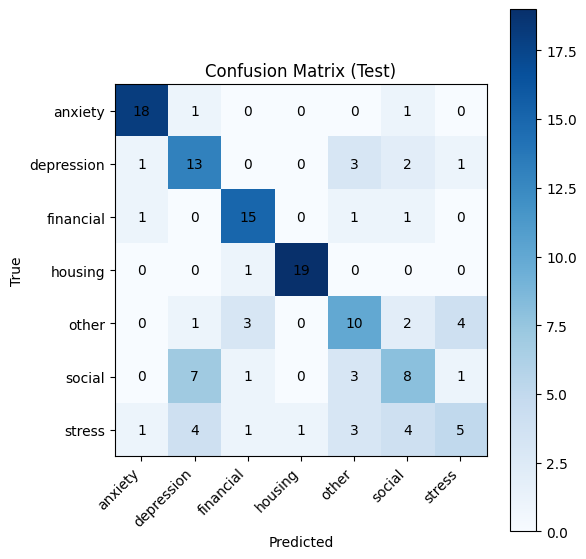

In [29]:
# Install deps (once per session)
!pip install scikit-learn

import os, re, pandas as pd, numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
import matplotlib.pyplot as plt

# 1) Load data (prefers cleaned+severity file)
for fname in ["reddit_clean_with_severity.csv", "reddit_clean.csv"]:
    if os.path.exists(fname):
        df = pd.read_csv(fname)
        print(f"Loaded: {fname}, shape={df.shape}")
        break
else:
    raise FileNotFoundError("Upload reddit_clean_with_severity.csv or reddit_clean.csv")

# Expect columns: 'clean_text' (or 'content_ml'), 'label'
text_col = "clean_text" if "clean_text" in df.columns else ("content_ml" if "content_ml" in df.columns else None)
if text_col is None:
    raise ValueError("No text column found. Expected 'clean_text' or 'content_ml'.")

# 2) Optional numeric features: severity + symptoms (if present)
numeric_cols = []
if "compound" in df.columns:           # VADER severity score
    numeric_cols.append("compound")

# Add any symptom flag columns that are 0/1
symptom_like = [c for c in df.columns if re.match(r"^(insomnia_sleep|fatigue_energy|concentration|anhedonia_interest|anxiety_panic|low_mood_hopeless|irritability|appetite_weight|somatic_pain|work_school_stress|self_harm_ideation|symptom_count)$", c)]
numeric_cols.extend(symptom_like)

print("Text column:", text_col)
print("Extra numeric features:", numeric_cols if numeric_cols else "None")

# Keep only rows with non-empty text and known labels
df = df[[text_col, "label"] + numeric_cols].dropna(subset=[text_col, "label"]).copy()
df[text_col] = df[text_col].astype(str).str.strip()
df = df[df[text_col].str.len() > 0]

# 3) Train/Val/Test split (80/10/10), stratified by label
X_train, X_temp, y_train, y_temp = train_test_split(
    df[[text_col] + numeric_cols], df["label"], test_size=0.20, random_state=42, stratify=df["label"]
)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.50, random_state=42, stratify=y_temp
)
print("Sizes:", len(X_train), len(X_val), len(X_test))

# 4) Column transformer: TF-IDF for text, scaler for numeric extras
text_tf = TfidfVectorizer(
    ngram_range=(1,2),     # unigrams + bigrams
    min_df=3,              # ignore very rare terms
    max_df=0.9,            # ignore super-common tokens
    sublinear_tf=True
)

transformers = [("tfidf", text_tf, text_col)]
if numeric_cols:
    transformers.append(("num", StandardScaler(with_mean=False), numeric_cols))  # with_mean=False to work with sparse

preprocess = ColumnTransformer(transformers, remainder="drop", sparse_threshold=1.0)

# 5) Classifier (strong baseline)
clf = LogisticRegression(
    max_iter=2000,
    n_jobs=None,
    class_weight=None  # set to "balanced" if your data is imbalanced
)

pipe = Pipeline([
    ("prep", preprocess),
    ("clf", clf)
])

# 6) Fit on train, validate on val
pipe.fit(X_train, y_train)

y_val_pred = pipe.predict(X_val)
print("\n=== Validation ===")
print("Accuracy:", accuracy_score(y_val, y_val_pred))
print("Macro F1:", f1_score(y_val, y_val_pred, average="macro"))
print(classification_report(y_val, y_val_pred, digits=3))

# 7) Final test evaluation
y_test_pred = pipe.predict(X_test)
print("\n=== Test ===")
print("Accuracy:", accuracy_score(y_test, y_test_pred))
print("Macro F1:", f1_score(y_test, y_test_pred, average="macro"))
print(classification_report(y_test, y_test_pred, digits=3))

# 8) Confusion matrix
labels_order = sorted(df["label"].unique())
cm = confusion_matrix(y_test, y_test_pred, labels=labels_order)

fig, ax = plt.subplots(figsize=(6,6))
im = ax.imshow(cm, cmap="Blues")
ax.set_xticks(np.arange(len(labels_order))); ax.set_xticklabels(labels_order, rotation=45, ha="right")
ax.set_yticks(np.arange(len(labels_order))); ax.set_yticklabels(labels_order)
for i in range(len(labels_order)):
    for j in range(len(labels_order)):
        ax.text(j, i, cm[i, j], ha="center", va="center")
ax.set_title("Confusion Matrix (Test)")
ax.set_xlabel("Predicted"); ax.set_ylabel("True")
plt.colorbar(im); plt.tight_layout(); plt.show()


Index(['id', 'subreddit', 'title', 'text', 'created_utc', 'created_iso',
       'score', 'num_comments', 'permalink', 'label'],
      dtype='object')


/tmp/ipython-input-1893116996.py:27: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


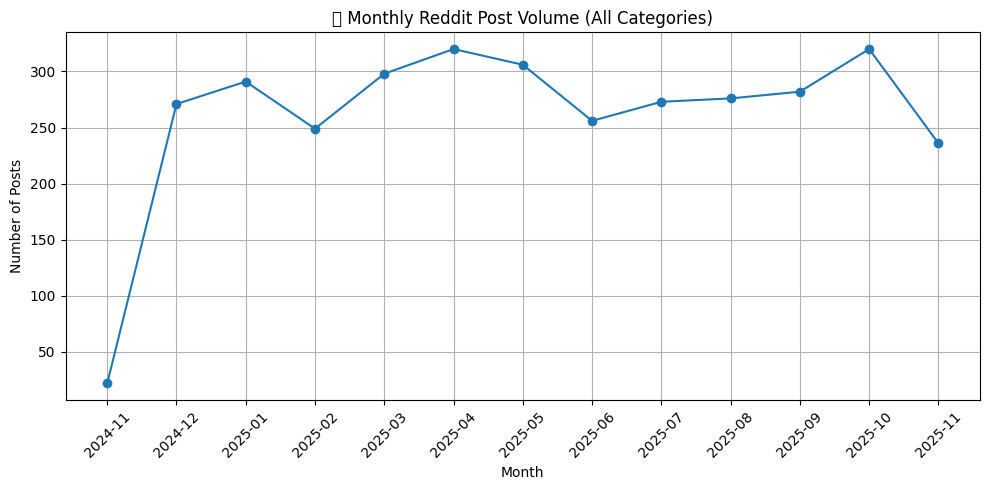

/tmp/ipython-input-1893116996.py:40: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


<Figure size 1200x600 with 0 Axes>

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


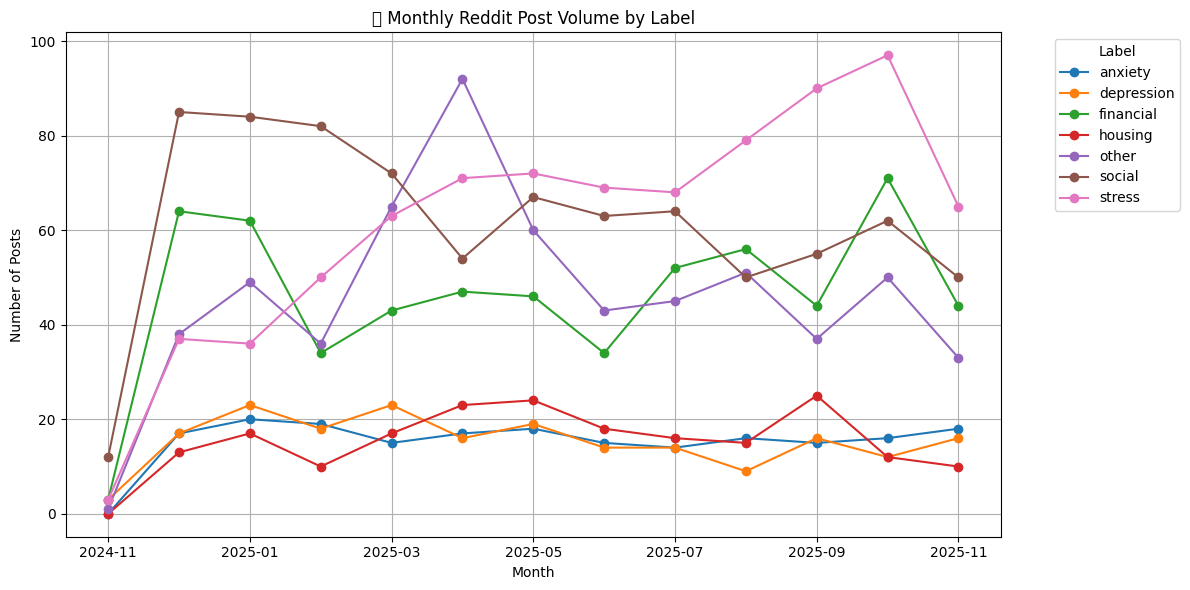

In [50]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_csv("reddit_posts_labeled.csv", parse_dates=["created_iso"], low_memory=False)

# Check column names
print(df.columns)

# Make sure the date column exists
if "created_iso" not in df.columns:
    raise ValueError("Missing 'created_iso' column — make sure you used the dataset with timestamps!")

# Convert to monthly period
df["month"] = df["created_iso"].dt.to_period("M").astype(str)

# 1️⃣ Overall post volume per month
monthly_counts = df["month"].value_counts().sort_index()

plt.figure(figsize=(10,5))
plt.plot(monthly_counts.index, monthly_counts.values, marker='o')
plt.title("📈 Monthly Reddit Post Volume (All Categories)")
plt.xlabel("Month")
plt.ylabel("Number of Posts")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# 2️⃣ Post volume per label (optional breakdown)
monthly_by_label = df.groupby(["month", "label"]).size().unstack(fill_value=0)

plt.figure(figsize=(12,6))
monthly_by_label.plot(kind='line', marker='o', figsize=(12,6))
plt.title("📊 Monthly Reddit Post Volume by Label")
plt.xlabel("Month")
plt.ylabel("Number of Posts")
plt.legend(title="Label", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# 🧠 STEP 1: Setup
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load your cleaned data (use the most recent cleaned file)
df = pd.read_csv("reddit_clean_with_severity.csv")

# 🧠 STEP 2: Create binary label
# 'other' → non-stressful (0), everything else → stressful (1)
df["is_stressful"] = df["label"].apply(lambda x: 0 if x.lower() == "other" else 1)

print(df["is_stressful"].value_counts())
print(df[["label", "is_stressful"]].head(10))

# 🧠 STEP 3: TF-IDF vectorization
tfidf = TfidfVectorizer(max_features=5000, ngram_range=(1,2), stop_words='english')
X = tfidf.fit_transform(df["clean_text"])
y = df["is_stressful"]

# 🧠 STEP 4: Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 🧠 STEP 5: Logistic Regression baseline
clf = LogisticRegression(max_iter=2000)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# 🧠 STEP 6: Evaluation
print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, digits=3))

# 🧠 STEP 7: Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Stressful','Stressful'], yticklabels=['Non-Stressful','Stressful'])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix - Binary Stress Classification")
plt.show()


In [ ]:
import transformers
print(transformers.__version__)


In [33]:
# 0) Install once per session
!pip install -q torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu121
!pip install -q transformers datasets evaluate scikit-learn matplotlib

import os, numpy as np, pandas as pd, matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, f1_score, accuracy_score
import evaluate
import torch

from datasets import Dataset
from transformers import (
    AutoTokenizer, AutoModelForSequenceClassification,
    DataCollatorWithPadding, TrainingArguments, Trainer
)

# 1) Load data (prefers cleaned+severity; falls back to cleaned)
for fname in ["reddit_clean_with_severity.csv", "reddit_clean.csv"]:
    if os.path.exists(fname):
        df = pd.read_csv(fname)
        print(f"Loaded: {fname}  shape={df.shape}")
        break
else:
    raise FileNotFoundError("Upload reddit_clean_with_severity.csv or reddit_clean.csv")

# choose text column
text_col = "clean_text" if "clean_text" in df.columns else "content_ml"
if text_col not in df.columns:
    raise ValueError("No text column found. Need 'clean_text' or 'content_ml'.")

# keep only necessary cols
df = df[[text_col, "label"]].dropna().copy()
df[text_col] = df[text_col].astype(str).str.strip()
df = df[df[text_col].str.len() > 0]



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 3.2 MB/s eta 0:00:00
Loaded: reddit_clean_with_severity.csv  shape=(1367, 15)


In [ ]:
# 2) Encode labels  (REPLACE your current block from here down to the split)
le = LabelEncoder()
df["label_id"] = le.fit_transform(df["label"])

# Keep ONLY text + numeric labels, and rename to the exact name 'labels' that Trainer expects
df = df[[text_col, "label_id"]].copy()
df.rename(columns={"label_id": "labels"}, inplace=True)
df[text_col] = df[text_col].astype(str).str.strip()
df = df[df[text_col].str.len() > 0]
df["labels"] = df["labels"].astype(int)

id2label = {i: l for i, l in enumerate(le.classes_)}
label2id = {l: i for i, l in id2label.items()}
num_labels = len(id2label)
print("Labels:", id2label)

# 3) Train/val/test split (80/10/10 stratified) — stratify on the numeric 'labels'
from sklearn.model_selection import train_test_split
train_df, temp_df = train_test_split(df, test_size=0.20, stratify=df["labels"], random_state=42)
val_df, test_df   = train_test_split(temp_df, test_size=0.50, stratify=temp_df["labels"], random_state=42)
print("Sizes:", len(train_df), len(val_df), len(test_df))


In [ ]:
# 4) Hugging Face datasets — ONLY keep text + 'labels'
from datasets import Dataset

train_df = train_df[[text_col, "labels"]].reset_index(drop=True)
val_df   = val_df[[text_col, "labels"]].reset_index(drop=True)
test_df  = test_df[[text_col, "labels"]].reset_index(drop=True)

train_ds = Dataset.from_pandas(train_df)
val_ds   = Dataset.from_pandas(val_df)
test_ds  = Dataset.from_pandas(test_df)


In [ ]:
# 5) Load tokenizer
model_name = "distilbert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_name)

# Tokenizer function — ensure truncation; data collator will pad
def tok(batch):
    return tokenizer(batch[text_col], truncation=True, padding=False, max_length=256)

train_ds = train_ds.map(tok, batched=True, remove_columns=[text_col])
val_ds   = val_ds.map(tok, batched=True, remove_columns=[text_col])
test_ds  = test_ds.map(tok, batched=True, remove_columns=[text_col])


In [ ]:
from transformers import DataCollatorWithPadding, AutoModelForSequenceClassification

data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

model = AutoModelForSequenceClassification.from_pretrained(
    model_name, num_labels=num_labels, id2label=id2label, label2id=label2id
)


In [ ]:
from transformers import TrainingArguments

args = TrainingArguments(
    output_dir="distilbert-stress",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=32,
    num_train_epochs=3,
    weight_decay=0.01,
    logging_steps=50,
    report_to="none",
    load_best_model_at_end=False,  # no per-epoch eval/save in this option
)


In [ ]:
from transformers import Trainer
import numpy as np, evaluate
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix

acc_metric = evaluate.load("accuracy")
f1_metric  = evaluate.load("f1")

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    preds = np.argmax(logits, axis=-1)
    return {
        "accuracy": acc_metric.compute(predictions=preds, references=labels)["accuracy"],
        "macro_f1": f1_metric.compute(predictions=preds, references=labels, average="macro")["f1"],
    }

trainer = Trainer(
    model=model,
    args=args,
    train_dataset=train_ds,
    eval_dataset=val_ds,
    tokenizer=tokenizer,              # deprecation warning is OK
    data_collator=data_collator,
    compute_metrics=compute_metrics,
)


In [ ]:
trainer.train()


/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Step,Training Loss
50,1.804200


Step,Training Loss
50,1.804200
100,1.388000
150,1.192600
200,1.037900


In [51]:
print("\n=== Validation Metrics ===")
print(trainer.evaluate(eval_dataset=val_ds))

pred_test = trainer.predict(test_ds)
y_true = np.array(test_df["labels"])
y_pred = pred_test.predictions.argmax(axis=-1)

print("\n=== Test Metrics ===")
print("Accuracy:", accuracy_score(y_true, y_pred))
print("Macro F1:", f1_score(y_true, y_pred, average="macro"))
print(classification_report(y_true, y_pred, target_names=list(id2label.values())))



=== Validation Metrics ===


/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


{'eval_loss': 1.0904531478881836, 'eval_accuracy': 0.6277372262773723, 'eval_macro_f1': 0.6222050965558125, 'eval_runtime': 219.7897, 'eval_samples_per_second': 0.623, 'eval_steps_per_second': 0.023, 'epoch': 3.0}


/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)



=== Test Metrics ===
Accuracy: 0.7445255474452555
Macro F1: 0.7352020320415145
              precision    recall  f1-score   support

     anxiety       0.94      0.85      0.89        20
  depression       0.61      0.85      0.71        20
   financial       0.85      0.94      0.89        18
     housing       1.00      1.00      1.00        20
       other       0.63      0.60      0.62        20
      social       0.57      0.65      0.60        20
      stress       0.67      0.32      0.43        19

    accuracy                           0.74       137
   macro avg       0.75      0.74      0.74       137
weighted avg       0.75      0.74      0.74       137



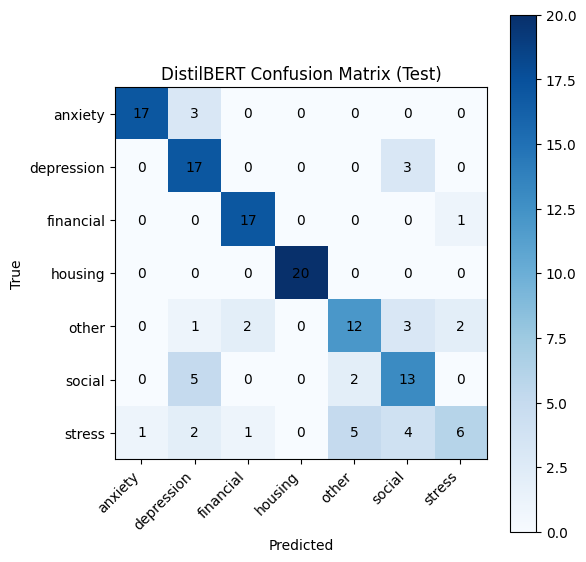

In [52]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(6,6))
plt.imshow(cm, cmap="Blues")
plt.xticks(range(num_labels), list(id2label.values()), rotation=45, ha="right")
plt.yticks(range(num_labels), list(id2label.values()))
for i in range(num_labels):
    for j in range(num_labels):
        plt.text(j, i, cm[i, j], ha="center", va="center")
plt.title("DistilBERT Confusion Matrix (Test)")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.colorbar()
plt.tight_layout()
plt.show()


In [53]:
trainer.save_model("distilbert_stressor_model")
tokenizer.save_pretrained("distilbert_stressor_model")



('distilbert_stressor_model/tokenizer_config.json',
 'distilbert_stressor_model/special_tokens_map.json',
 'distilbert_stressor_model/vocab.txt',
 'distilbert_stressor_model/added_tokens.json',
 'distilbert_stressor_model/tokenizer.json')

In [54]:
from transformers import pipeline

clf = pipeline(
    "text-classification",
    model="distilbert_stressor_model",
    tokenizer="distilbert_stressor_model",
    return_all_scores=False
)


Device set to use cpu
/usr/local/lib/python3.12/dist-packages/transformers/pipelines/text_classification.py:111: UserWarning: `return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(


In [55]:
text = "I lost my job and I don’t know how to pay rent."
clf(text)


[{'label': 'financial', 'score': 0.46105870604515076}]

In [56]:
preds = [np.argmax(p) for p in trainer.predict(test_ds).predictions]
true  = test_df["labels"].tolist()

test_df["pred_label"] = preds
test_df["true_label"] = true

errors = test_df[test_df["pred_label"] != test_df["true_label"]]
errors.head()


/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


,clean_text,labels,pred_label,true_label
6,today i thought what if we talked to ourselves...,6,5,6
7,i want to die because i m not allowed to be my...,5,1,5
8,coldplay hasn t made a single in years but yes...,4,6,4
10,politically terrified of the future how to dis...,0,1,0
21,wife s personality changed overnight left me f...,6,5,6


In [57]:
import numpy as np
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score

# ---------- STEP 5: Re-evaluate & save metrics nicely ----------

print("=== Validation Metrics ===")
val_metrics = trainer.evaluate(eval_dataset=val_ds)
print(val_metrics)

print("\n=== Test Metrics ===")
pred_test = trainer.predict(test_ds)
y_true = test_df["labels"].to_numpy()
y_pred = np.argmax(pred_test.predictions, axis=-1)

print("Accuracy:", accuracy_score(y_true, y_pred))
print("Macro F1:", f1_score(y_true, y_pred, average="macro"))
print(
    classification_report(
        y_true, y_pred,
        target_names=[id2label[i] for i in range(num_labels)],
        digits=3,
    )
)

# ---------- STEP 6: Save model, tokenizer, and label map ----------

save_dir = "distilbert-stress-final"

# save the fine-tuned model
trainer.save_model(save_dir)

# save tokenizer
tokenizer.save_pretrained(save_dir)

# save label mapping (id -> label)
with open(f"{save_dir}/labels.txt", "w") as f:
    for i in range(num_labels):
        f.write(f"{i}\t{id2label[i]}\n")

print(f"✅ Saved model + tokenizer + labels to: {save_dir}")

# ---------- STEP 7: Inference helper + error analysis ----------

import torch

def predict_post(text: str):
    """Classify a single Reddit post into your 7 labels."""
    model = trainer.model
    model.eval()
    inputs = tokenizer(
        text,
        truncation=True,
        padding=True,
        max_length=256,
        return_tensors="pt",
    )

    with torch.no_grad():
        outputs = model(**inputs)
        logits = outputs.logits
        probs = torch.softmax(logits, dim=-1).cpu().numpy()[0]

    pred_id = int(np.argmax(probs))
    pred_label = id2label[pred_id]
    return pred_label, float(probs[pred_id])

# Example: try a few texts
examples = [
    "I'm two months behind on rent and don't know what to do.",
    "I feel like my friends have slowly stopped talking to me.",
    "My heart races every time I have to present at work.",
]

for txt in examples:
    label, conf = predict_post(txt)
    print(f"\nText: {txt}\n→ Predicted label: {label} (confidence ~{conf:.2f})")

# ---------- Error analysis: save test predictions to CSV ----------

test_df_analysis = test_df.copy()
test_df_analysis["true_label"] = test_df_analysis["labels"].map(id2label)
test_df_analysis["pred_id"] = y_pred
test_df_analysis["pred_label"] = test_df_analysis["pred_id"].map(id2label)
test_df_analysis["correct"] = test_df_analysis["true_label"] == test_df_analysis["pred_label"]

# OPTIONAL: if you still have the original text column in a separate df, merge it back here.
# For now we just keep labels and correctness.
test_df_analysis.to_csv("distilbert_test_predictions.csv", index=False)
print("📄 Saved detailed test predictions to distilbert_test_predictions.csv")


=== Validation Metrics ===


/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


{'eval_loss': 1.0904531478881836, 'eval_accuracy': 0.6277372262773723, 'eval_macro_f1': 0.6222050965558125, 'eval_runtime': 53.4359, 'eval_samples_per_second': 2.564, 'eval_steps_per_second': 0.094, 'epoch': 3.0}

=== Test Metrics ===


/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Accuracy: 0.7445255474452555
Macro F1: 0.7352020320415145
              precision    recall  f1-score   support

     anxiety      0.944     0.850     0.895        20
  depression      0.607     0.850     0.708        20
   financial      0.850     0.944     0.895        18
     housing      1.000     1.000     1.000        20
       other      0.632     0.600     0.615        20
      social      0.565     0.650     0.605        20
      stress      0.667     0.316     0.429        19

    accuracy                          0.745       137
   macro avg      0.752     0.744     0.735       137
weighted avg      0.751     0.745     0.735       137

✅ Saved model + tokenizer + labels to: distilbert-stress-final

Text: I'm two months behind on rent and don't know what to do.
→ Predicted label: housing (confidence ~0.41)

Text: I feel like my friends have slowly stopped talking to me.
→ Predicted label: other (confidence ~0.24)

Text: My heart races every time I have to present at work.
→ P

In [58]:
# Load predictions
preds_df = pd.read_csv("distilbert_test_predictions.csv")

# Filter incorrect predictions
errors = preds_df[preds_df["pred_label"] != preds_df["true_label"]]

# Show 10 random errors
errors.sample(10)[["clean_text", "true_label", "pred_label"]]


,clean_text,true_label,pred_label
60,every time i socialize i m reminded of the gap...,depression,social
65,is in months was nearly years ago i am so conf...,other,depression
21,wife s personality changed overnight left me f...,stress,social
39,does anyone else think you gonna die early i d...,anxiety,depression
106,i stole thousands from my employer and got awa...,other,financial
90,i hate the love yourself advice with all my so...,social,depression
44,bending over for my gf in our first year toget...,social,other
26,that weird feeling you get when you switch job...,stress,financial
78,i wasted my youth now i m a year old awkward l...,social,depression
54,whoever said money can t buy happiness is a fu...,other,financial
